In [ ]:
import keras 
from keras.models import Sequential 
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from ipywidgets import widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (1).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (10).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (100).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (124).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (118).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (119).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (112).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (132).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (104).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (133).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (127).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (13).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (131).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tumor/p (125).jpg
/content/drive/MyDrive/dataset/Training/pituitary_tu

**FOLDER PATH**

In [ ]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset/Training', i)
    for j in os.listdir(folderPath):
            img = cv2.imread(os.path.join(folderPath,j))
            img = cv2.resize(img,(image_size, image_size))
            X_train.append(img)
            Y_train.append(i)
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset/Testing', i)
    for j in os.listdir(folderPath):
            img = cv2.imread(os.path.join(folderPath,j))
            img = cv2.resize(img,(image_size, image_size))
            X_train.append(img)
            Y_train.append(i)    
            
X_train = np.array(X_train)
Y_train = np.array(Y_train)



In [ ]:
X_train, Y_train = shuffle(X_train, Y_train, random_state = 101)
X_train.shape


(3641, 150, 150, 3)

**TRAIN TEST SPLIT**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state = 101)


In [ ]:
Y_train_new = []
for i in Y_train:
    Y_train_new.append(labels.index(i))
    
Y_train = Y_train_new
Y_train = tf.keras.utils.to_categorical(Y_train)

Y_test_new = []
for i in Y_test:
    Y_test_new.append(labels.index(i))
    
Y_test = Y_test_new
Y_test = tf.keras.utils.to_categorical(Y_test)


**CNN MODEL**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])


In [ ]:
history = model.fit(X_train, Y_train, epochs = 50, validation_split = 0.1)

Epoch 1/50
93/93 [==============================] - 26s 111ms/step - loss: 1.6598 - accuracy: 0.2917 - val_loss: 1.3980 - val_accuracy: 0.2104
Epoch 2/50
93/93 [==============================] - 9s 93ms/step - loss: 1.3333 - accuracy: 0.3165 - val_loss: 1.3469 - val_accuracy: 0.3140
Epoch 3/50
93/93 [==============================] - 9s 94ms/step - loss: 1.2536 - accuracy: 0.4610 - val_loss: 1.2147 - val_accuracy: 0.4360
Epoch 4/50
93/93 [==============================] - 9s 95ms/step - loss: 1.0069 - accuracy: 0.5875 - val_loss: 1.2215 - val_accuracy: 0.4482
Epoch 5/50
93/93 [==============================] - 9s 94ms/step - loss: 0.8898 - accuracy: 0.6313 - val_loss: 0.8824 - val_accuracy: 0.6006
Epoch 6/50
93/93 [==============================] - 9s 93ms/step - loss: 0.7565 - accuracy: 0.6893 - val_loss: 0.8067 - val_accuracy: 0.6494
Epoch 7/50
93/93 [==============================] - 9s 95ms/step - loss: 0.6977 - accuracy: 0.7083 - val_loss: 1.1327 - val_accuracy: 0.6006
Epoch 8/50


In [ ]:

loss, accuracy = model.evaluate(X_test,Y_test)

#print accuracy    
print('Accuracy: %f' % (accuracy*100))


12/12 [==============================] - 1s 67ms/step - loss: 0.2991 - accuracy: 0.9425
Accuracy: 94.246578


In [ ]:
#Save the trained model
model.save("/content/drive/MyDrive/brain_tumor_classification_model.h5")

In [ ]:
from sklearn.metrics import classification_report

# obtain predictions for test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(Y_test, axis=1)

# generate classification report
target_names = labels
print(classification_report(y_true_classes, y_pred_classes, target_names=target_names))


12/12 [==============================] - 0s 25ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.91      0.97      0.94        88
meningioma_tumor       0.94      0.92      0.93        95
        no_tumor       0.98      0.92      0.95        87
 pituitary_tumor       0.95      0.97      0.96        95

        accuracy                           0.94       365
       macro avg       0.94      0.94      0.94       365
    weighted avg       0.94      0.94      0.94       365



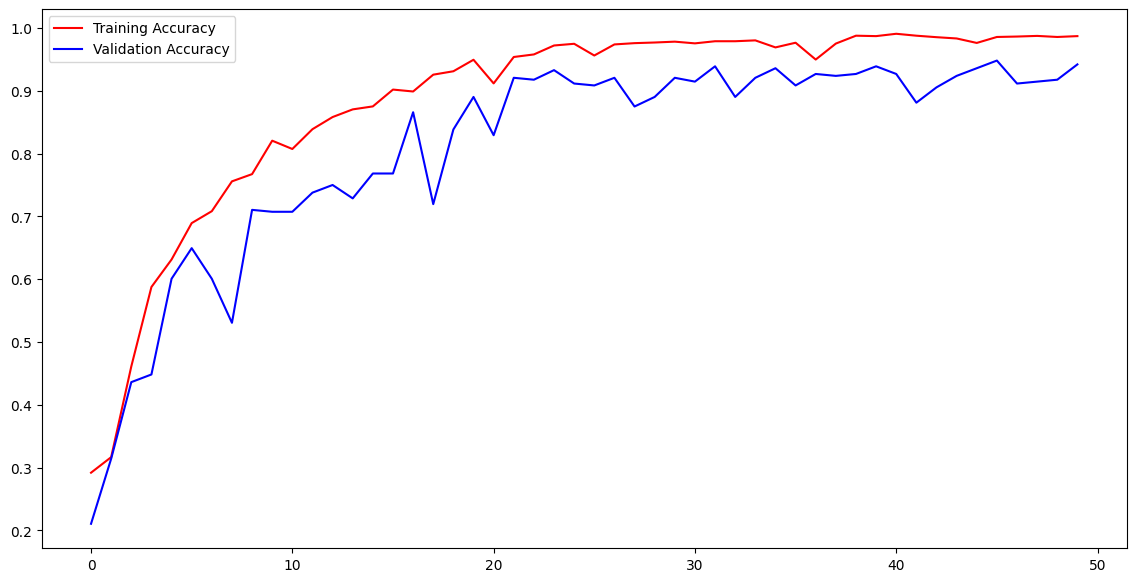

In [ ]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

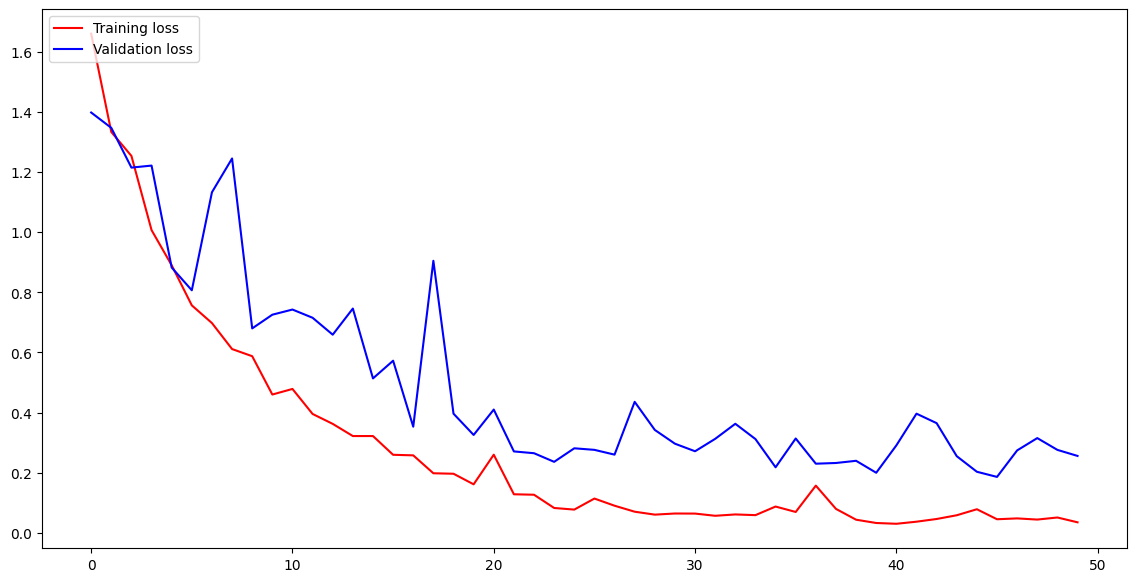

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
img = cv2.imread('/content/drive/MyDrive/maharaj baag/IMG-20220918-WA0035.jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape


(150, 150, 3)

In [ ]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

In [ ]:
#from tensorflow.keras.preprocessing import image
#img = image.load_img('/kaggle/input/brain-tumor-classification-mri/Training/pituitary_tumor/p (123).jpg')
#plt.imshow(img,interpolation='nearest')
#plt.show()

In [ ]:
a=model.predict(img_array)
indices = a.argmax()
predicted_label_name = labels[indices]
print(predicted_label_name)


1/1 [==============================] - 0s 27ms/step
no_tumor
